<a href="https://colab.research.google.com/github/anaclarachaves/ResumoCursos_cognitiveclass/blob/master/DA0101EN%20-%20Data%20Analysis%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Resumo por:** Ana Clara Chaves Sousa

# DEFINIÇÃO DO PROBLEMA

O dataframe que será utilizado nessa análise é sobre carros usados. O objetivo é criar um modelo de Machine Learning que possa prever o preço de um carro usado a partir de diversos atributos. <br>
> Esse documento é um resumo do curso DA0101EN do Cognitive Class.

# INFORMAÇÕES SOBRE O DATASET

**Data de criação:** 1987<br>
**Criado por:** Jeffrey C. Schlimmer<br>

**Fontes:**<br>
1) 1985 Model Import Car and Truck Specifications, 1985 Ward's<br>
Automotive Yearbook.<br>
2) Personal Auto Manuals, Insurance Services Office, 160 Water<br>
Street, New York, NY 10038<br>
3) Insurance Collision Report, Insurance Institute for Highway<br>
Safety, Watergate 600, Washington, DC 20037


**Descrição do dataset segundo o criador:**<br>
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.  Actuarians call this process "symboling".  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.<br>
The third factor is the relative average loss payment per insured vehicle year.  This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

# 1. Importação de Bibliotecas e de Dados

## 1.1 - Importação de Bibliotecas

In [ ]:
# Fazendo importação das bibliotecas principais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# As demais bibliotecas que serão utilizadas na EDA serão importadas à medida que forem necessárias

## 1.2 - Importação de Dados

> Para que os dados sejam encontrados, o documento precisa estar dentro da pasta do notebook (no google colab, você pode fazer o upload na barra esquerda lateral). Links também podem ser utilizados.

In [ ]:
# Utilizando a biblioteca PANDAS para fazer a importação dos dados e atribuindo a df

df = pd.read_csv('https://raw.githubusercontent.com/anaclarachaves/CognitiveClass-DA0101EN/master/dados_auto.csv')

# 2. Limpeza de Dados

## 2.1 - Pré-visualização de Dados

Antes de começar a limpeza dos dados, precisamos visualizá-los para entender o que pode ser feito.

> A função df.head(20) abaixo mostrou as 20 primeiras linhas do dataframe (esse número pode ser modificado de acordo com a necessidade). Como padrão, df.head() mostra as 5 primeiras linhas.

In [ ]:
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


> Da mesma forma, podemos utilizar a função df.tail(), mas esta mostra as últimas linhas ao invés das primeiras.

In [ ]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


> A função df.shape mostra o número de (linhas, colunas) do dataframe.

In [ ]:
df.shape

(205, 26)

> A função df.mode() mostra a moda de cada coluna.

In [ ]:
df.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,?,toyota,gas,std,four,sedan,fwd,front,94.5,157.3,63.8,50.8,2385.0,ohc,four,92,mpfi,3.62,3.40,9.0,68,5500,31.0,25.0,?
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> A função df.median() mostra a mediana de cada coluna numérica.

In [ ]:
df.median()

symboling               1.0
wheel-base             97.0
length                173.2
width                  65.5
height                 54.1
curb-weight          2414.0
engine-size           120.0
compression-ratio       9.0
city-mpg               24.0
highway-mpg            30.0
dtype: float64

> A função df.describe() faz uma análise estatística dos dados quantitativos, e mostra dados como: desvio padrão, média, valores mínimo e máximo, os quartis.

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


> Podemos ainda incluir mais informações à função df.describe(). Se quisermos ver informações das colunas do tipo 'object', podemos fazer isso conforme a função abaixo:
>> **OBS**: Podemos ver que as informações unique, top e freq foram adicionadas.

In [ ]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


## 2.2 - Análise de Dados Nulos

Visualizando o dataframe, podemos ver que algumas células estão com '?' e isso deve ser modificado. Assim, substituimos o ponto de interrogação por valores nulos.
> Para isso, utiliza-se a função df.replace('o que deve ser substituído', 'pelo que será substituído').
>> np.NaN irá colocar o valor vazio (NaN) no lugar.

In [ ]:
# Para que a substituição seja feita no dataframe original, é preciso usar df = função

df = df.replace('?',np.NaN)

In [ ]:
# Executando o código df.head(20) novamente para verificar se a substituição foi feita corretamente

df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


Agora, podemos visualizar qual o somatório de dados nulos em cada coluna.

In [ ]:
# Função para verificar a soma de dados nulos em cada uma das colunas
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Com base na função acima, podemos observar que as seguintes colunas possuem dados nulos:
> normalized-losses: 41<br>
num-of-doors: 2<br>
bore: 4<br>
stroke: 4<br>
horsepower: 2<br>
peak-rpm: 2<br>
price: 4


---

Como a coluna 'price' é o que queremos prever, é inútil manter as linhas em que esse valor está nulo.


In [ ]:
# Deletando as linhas em que os valores da coluna 'price' são nulos
# axis=0 corresponde às linhas, axis=1 corresponde às colunas

df = df.dropna(subset=["price"], axis=0)

In [ ]:
# Verificando a soma dos valores nulos novamente

df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Os novos dados sobre os valores nulos são:
> normalized-losses: 37<br>
num-of-doors: 2<br>
bore: 4<br>
stroke: 4<br>
horsepower: 2<br>
peak-rpm: 2<br>

---

Agora, vamos analisar uma coluna por vez.


#### Coluna: normalized-losses

Essa é a coluna com a maior quantidade de valores nulos (37). Primeiramente, é importante saber qual a quantidade total de observações (linhas) para saber qual a porcentagem desse valor.

In [ ]:
# Verificando o formato do dataframe (linhas, colunas)

df.shape

(201, 26)

In [ ]:
# Calculando e printando a porcentagem

porcent = (37/201) * 100
print('{:.2f}%'.format(porcent))

18.41%


> A partir dos dados acima, sabemos que o valor total de números nulos corresponde a 18,41% de todos os dados de normalized-losses. Como é uma quantidade aceitável, devemos fazer a substituição.
>> No caso dessa coluna específica, esses valores serão substituídos pela média. Porém, a mediana, a moda ou outro valor também poderia ser utilizado.
>>> Lembrando que, para fazer esse cálculo os valores da coluna precisam estar formatados como números.

In [ ]:
# Verificando os formatos de cada coluna

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

> A coluna normalized-losses está com dados do tipo 'object' e deveria ser 'float64'. Vamos fazer a conversão dos dados para que a média possa ser calculada.

In [ ]:
# Fazendo o cálculo da média e transformando em float
avg_norm = df["normalized-losses"].astype("float").mean()

# Printando o resultado
print("A média da coluna normalized-losses é:", avg_norm)

A média da coluna normalized-losses é: 122.0


Agora, podemos substituir os valores na coluna:

In [ ]:
# inplace = true é utilizado para que seja substituído no dataframe e não apenas na função

df["normalized-losses"].replace(np.nan, avg_norm, inplace=True)

Lista de colunas com valores nulos:
> <s>normalized-losses: 37</s><br>
num-of-doors: 2<br>
bore: 4<br>
stroke: 4<br>
horsepower: 2<br>
peak-rpm: 2<br>


#### Coluna: num-of-doors

In [ ]:
# Utilizando a função describe para ver as informações da coluna

df['num-of-doors'].describe()

count      199
unique       2
top       four
freq       113
Name: num-of-doors, dtype: object

In [ ]:
# Utilizando função para fazer a contagem de valores para cada valor único

df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

> Pela função acima, podemos ver que a grande maioria dos veículos possui quatro portas ao invés de duas. Sendo assim, no caso dessa coluna, iremos substituir o valor pela moda (o mais frequente).

In [ ]:
# Substituindo os valores nulos por 'four'

df["num-of-doors"].replace(np.nan, "four", inplace=True)

Lista de colunas com valores nulos:
> <s>normalized-losses: 37</s><br>
<s>num-of-doors: 2</s><br>
bore: 4<br>
stroke: 4<br>
horsepower: 2<br>
peak-rpm: 2<br>


#### Colunas: bore, stroke, horsepower, peak-rpm

Nas colunas que faltam, os valores nulos serão substituídos pelas suas médias, assim como na primeira coluna investigada.
> A função .astype será usada em todas as colunas que estejam formadas como object.

In [ ]:
# Calculando a média da coluna bore
avg_bore = df['bore'].astype('float').mean()
print("A média da coluna 'bore' é:", avg_bore)

A média da coluna 'bore' é: 3.3307106598984775


In [ ]:
# Fazendo a substituição

df["bore"].replace(np.nan, avg_bore, inplace=True)

Lista de colunas com valores nulos:
> <s>normalized-losses: 37</s><br>
<s>num-of-doors: 2</s><br>
<s>bore: 4</s><br>
stroke: 4<br>
horsepower: 2<br>
peak-rpm: 2<br>


In [ ]:
# Calculando a média da coluna 'stroke'
avg_stroke = df['stroke'].astype('float').mean()

# Printando o resultado
print("A média da coluna 'stroke' é:", avg_stroke)

# Substituindo na coluna
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

A média da coluna 'stroke' é: 3.2569035532994857


Lista de colunas com valores nulos:
> <s>normalized-losses: 37</s><br>
<s>num-of-doors: 2</s><br>
<s>bore: 4</s><br>
<s>stroke: 4</s><br>
horsepower: 2<br>
peak-rpm: 2<br>


In [ ]:
# Calculando a média da coluna 'horsepower'
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)

# Printando o resultado
print("A média da coluna 'horsepower' é:", avg_horsepower)

# Fazendo a substituição
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

A média da coluna 'horsepower' é: 103.39698492462311


Lista de colunas com valores nulos:
> <s>normalized-losses: 37</s><br>
<s>num-of-doors: 2</s><br>
<s>bore: 4</s><br>
<s>stroke: 4</s><br>
<s>horsepower: 2</s><br>
peak-rpm: 2<br>


In [ ]:
# Fazendo o cálculo da média
avg_peakrpm = df['peak-rpm'].astype('float').mean()

# Printando o resultado
print("A média da coluna 'peak rpm' é:", avg_peakrpm)

# Substituindo os valores nulos na coluna
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

A média da coluna 'peak rpm' é: 5117.587939698493


Lista de colunas com valores nulos:
> <s>normalized-losses: 37</s><br>
<s>num-of-doors: 2</s><br>
<s>bore: 4</s><br>
<s>stroke: 4</s><br>
<s>horsepower: 2<br>
peak-rpm: 2<br></s>


**Observação:** Não é sempre que os dados nulos poderão ser substituídos por outros valores ou dropados. Em alguns casos, pode ser que o ideal seja manter os dados nulos como eles estão. Os dados devem ser investigadas de acordo com a situação.

In [ ]:
# Utilizando novamente a função da soma dos dados nulos

df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## 2.3 - Formatação de Dados

Nessa etapa, é preciso verificar a formatação dos dados e fazer correções, se necessário.

In [ ]:
# Visualizando o formato dos dados de cada coluna

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

> Podemos observar que algumas colunas deveriam estar formatadas como numéricas (já tínhamos observado esse problema na etapa anterior ao calcular as médias). Sendo assim, precisamos fazer as devidas correções de formatação. <br>Para ter certeza de quais colunas devem formatadas, podemos visualizar algumas linhas:

In [ ]:
df.tail(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
185,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2212,ohc,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195
186,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2275,ohc,four,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2300,ohc,four,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
189,3,122,volkswagen,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,122,volkswagen,gas,std,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2661,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,183.1,66.9,55.1,2563,ohc,four,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940


Vamos fazer a checagem coluna por coluna:

* symboling: int64 | **Correto**. <br> 
* normalized-losses: object | **Incorreto**, são números inteiros.<br>
* make: object | **Correto**, são dados categóricos.<br>
* fuel-type: object | **Correto**, são dados categóricos.<br>
* aspiration: object | **Correto**, são dados categóricos.<br>
* num-of-doors: object | **Correto**, porque apesar de os automóveis terem 2 ou 4 portas, essa coluna pode ser considerada categórica.<br>
* body-style: object | **Correto**. <br>
* drive-wheels: object | **Correto**. <br>
* engine-location: object | **Correto**.<br>
* wheel-base: float64 | **Correto**, são números com casas decimais. <br>
* length: float64 | **Correto**.<br>
* width: float64 | **Correto**.<br>
* height: float64 | **Correto**.<br>
* curb-weight: int64 | **Correto**.<br>
* engine-type: object | **Correto**.<br>
* num-of-cylinders: object | **Correto**, mesmo caso da coluna 'num-of-doors'.<br>
* engine-size: int64 | **Correto**. <br>
* fuel-system: object | **Correto**.<br>
* bore: object | **Incorreto**, deveria ser float.<br>
* stroke: object | **Incorreto**, deveria ser float.<br>
* compression-ratio: float64 | **Correto**.<br>
* horsepower: object | **Incorreto**, são números inteiros.<br>
* peak-rpm: object | **Incorreto**, são inteiros.<br>
* city-mpg: int64 | **Correto**. <br>
* highway-mpg: int64 | **Correto**.<br>
* price: object | **Incorreto**, são inteiros.<br>

Sendo assim, as seguintes colunas deveriam ser formatadas:<br>
* **normalized-losses**: de object para int64.<br>
* **bore**: de object para float64.<br>
* **stroke**: de object para float64.<br>
* **horsepower**: de object para int64.<br>
* **peak-rpm**: de object para int64.<br>
* **price**: de object para int64.

Antes de fazer a correção da formatação nas colunas que aparentemente mostram apenas números inteiros, vamos utilizar a função .unique() para verificar se existe algum número com casa decimal.

In [ ]:
df['normalized-losses'].unique()

array([122.0, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [ ]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '101', '121', '182',
       '48', '70', '68', '88', '145', '58', '76', '60', '86', '100', '78',
       '90', '176', '262', '135', '84', '64', '120', '72', '123', '155',
       '184', '175', '116', '69', '55', '97', '152', '160', '200', '95',
       '142', '143', '207', 103.39698492462311, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [ ]:
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',
     

In [ ]:
df['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', 5117.587939698493, '5250', '4900', '4400', '6600', '5300'],
      dtype=object)

Com base nas funções acima, as correções devem ser feitas da seguinte forma:<br>
* **normalized-losses**: de object para int64.<br>
* **bore**: de object para float64.<br>
* **stroke**: de object para float64.<br>
* **horsepower**: de object para *float64*.<br>
* **peak-rpm**: de object para *float64*.<br>
* **price**: de object para int64.

In [ ]:
# Corrigindo cada coluna de acordo com o formato adequado

df["normalized-losses"] = df["normalized-losses"].astype("int")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
df["price"] = df["price"].astype("float")

In [ ]:
# Checando os dados

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## 2.4 - Análise de Outliers

*“Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto”* (Hawkins, 1980).

<a href="https://medium.com/ensina-ai/outlier-o-ponto-fora-da-curva-1f28f3d9c23">Recomendação de leitura.</a>

O boxplot é um diagrama de caixa construído utilizando as referências de valores mínimos e máximos, primeiro e terceiro quartil e mediana. O objetivo é encontrar outliers, que são valores de dados que estão distantes dos outros valores, podendo afetar seus resultados.

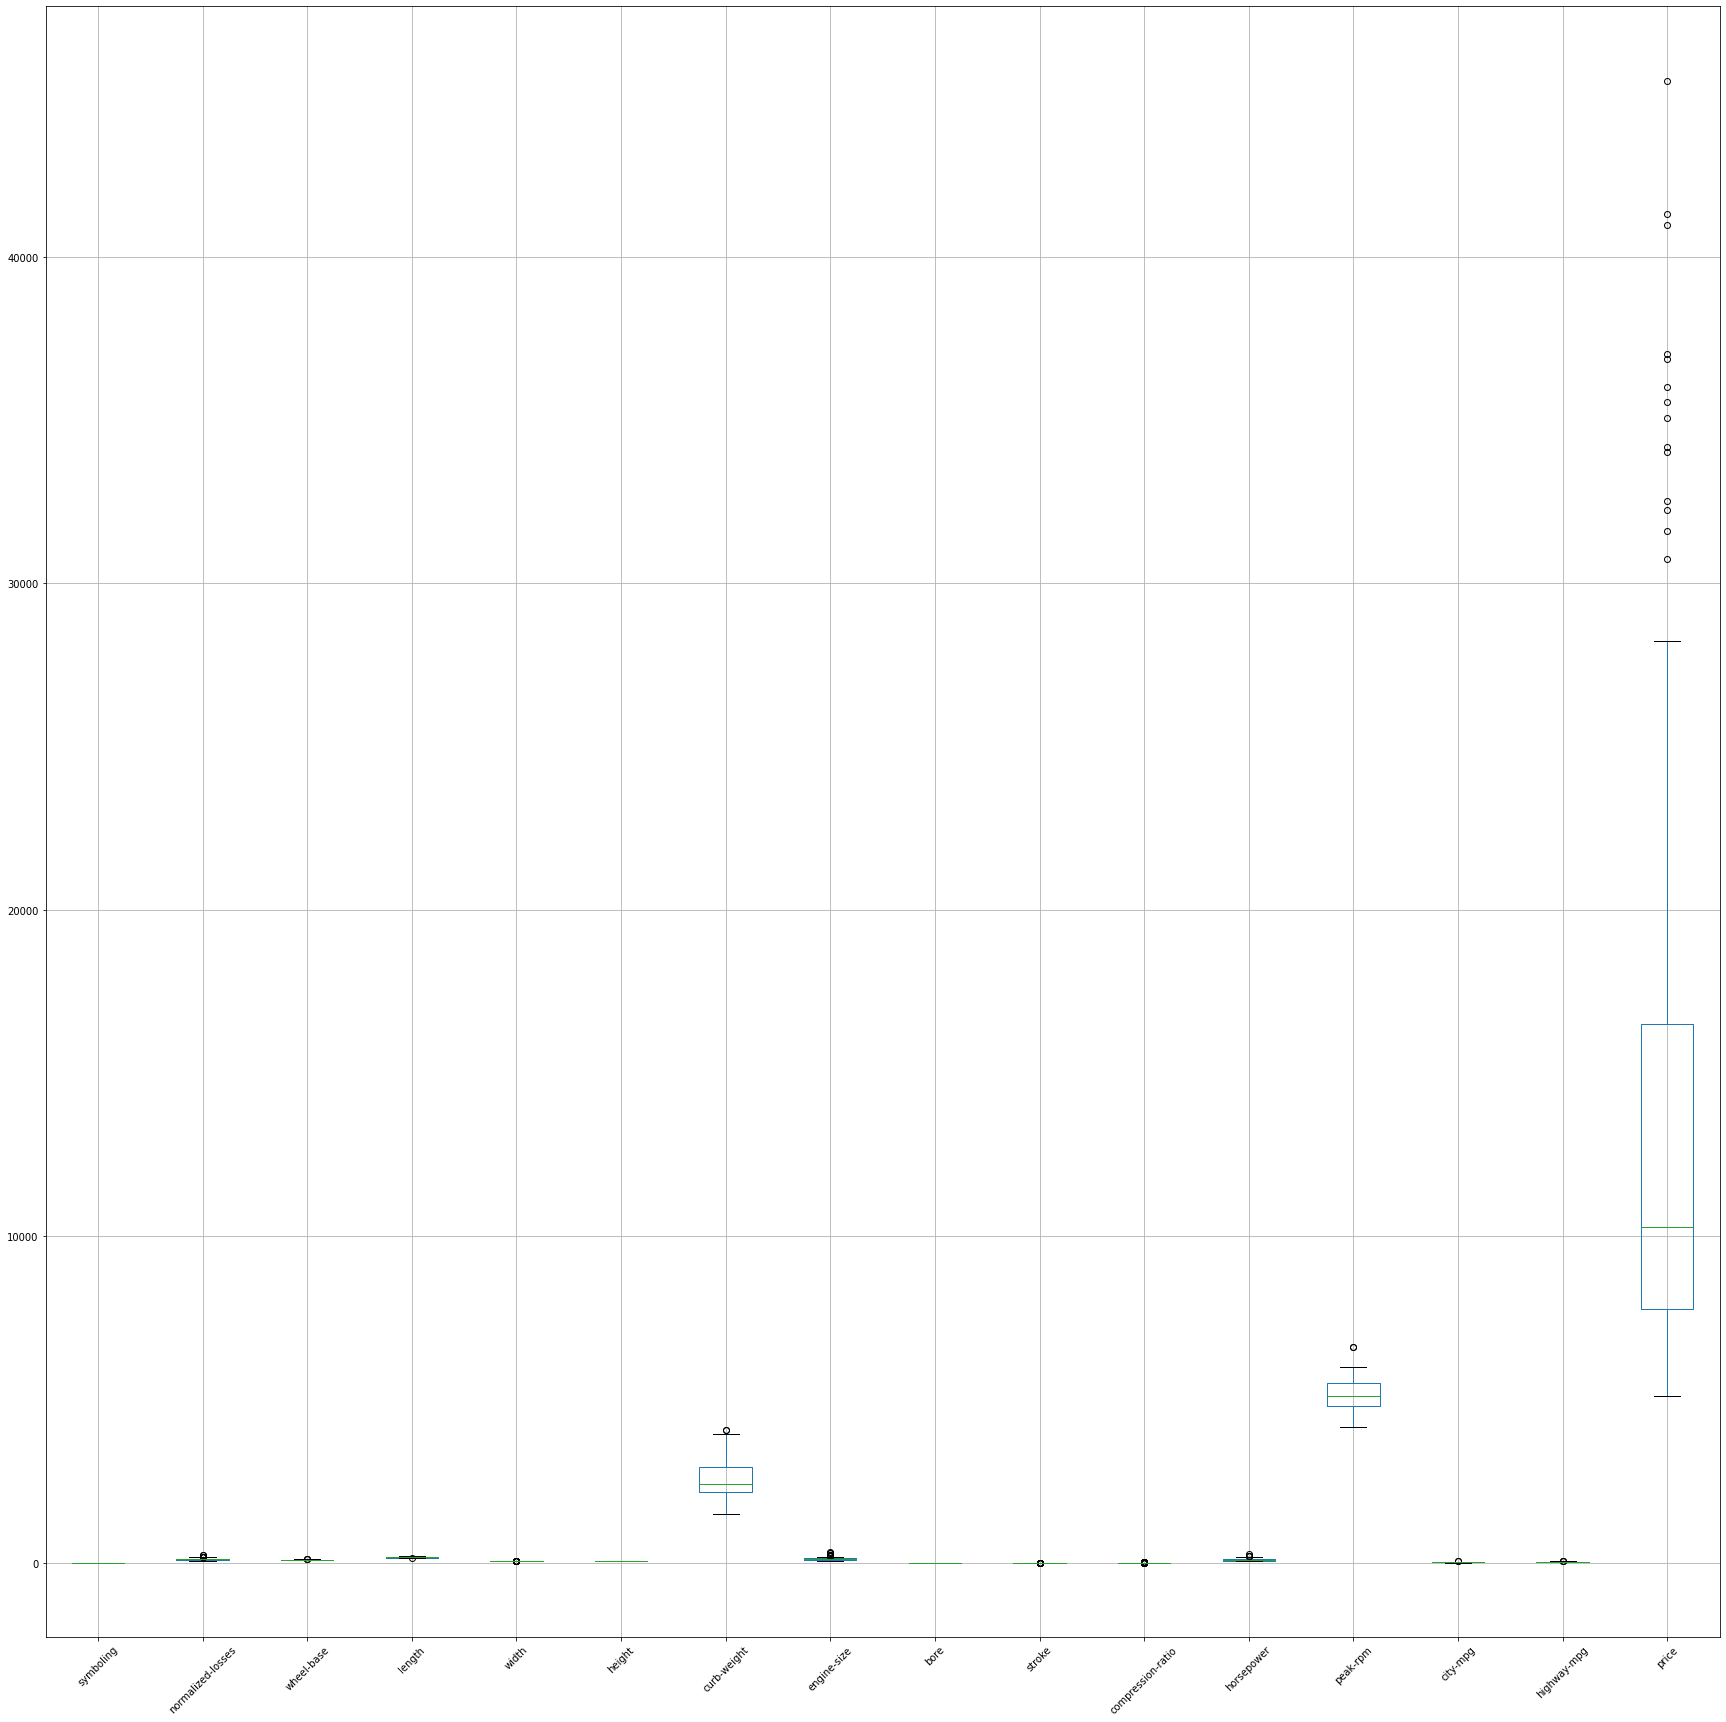

In [ ]:
# Gráfico de boxplot

plt.figure(figsize = (30, 30))
df.boxplot(rot = 45)

> A partir do gráfico acima, as únicas colunas que não possuem nenhum outlier são: symbolling, height, bore.<br>
>> Nenhum outlier será removido, apenas iremos visualizar as informações.


In [ ]:
# Função para detectar outliers por IQR
def outlier_treatment(column):
 sorted(column)
 Q1,Q3 = np.percentile(column, [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range, upper_range

### Coluna: normalized-losses

Para exemplificar a visualização dos outliers, vamos utilizar a coluna normalized-losses.

In [ ]:
# Aplicando a função na coluna
lower_range, upper_range = outlier_treatment(df['normalized-losses'])
print('The lower range is: ', lower_range)
print('The upper range is: ', upper_range)

The lower range is:  47.0
The upper range is:  191.0


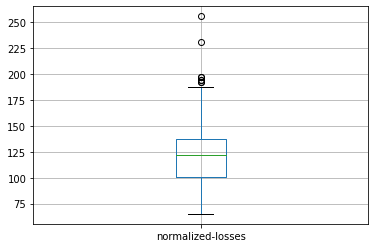

In [ ]:
# Visualizando o boxplot da coluna
df.boxplot('normalized-losses')

In [ ]:
# Aplicando o filtro para mostrar as linhas que contém os outliers
filtro1 = (df['normalized-losses'] > upper_range) | (df['normalized-losses'] < lower_range)
df[filtro1]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925.0
104,3,194,nissan,gas,std,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3071,ohcv,six,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,17199.0
105,3,194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0
106,1,231,nissan,gas,std,two,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
178,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,2976,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
179,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0


In [ ]:
# Usando a função shape para fazer a contagem de outliers (será o número de linhas)
df[filtro1].shape

(8, 26)

Muitas vezes, os outliers não devem simplesmente ser removidos. Cada caso deve ser investigado individualmente (coluna por coluna). <br>
A visualização da coluna normalized-losses foi apenas para exemplificar como podemos tirar essas informações.

# 3. Pré-processamento de Dados

## 3.1 - Padronização de Dados

**O que é?** <br>
Padronização é o processo de transformar dados em um formato comum que permite ao pesquisador fazer uma comparação significativa. Isso porque os dados podem ser coletados de diferentes lugares com diferentes formatos.

> Em nosso conjunto de dados, as colunas de consumo de combustível "city-mpg" e "highway-mpg" são representadas pela unidade de mpg.<br>
 Vamos transformar em L/100km pela função: *L/100km = 235 / mpg*

In [ ]:
# Utilizando a operação acima para criar as novas colunas com os valores em L/100km
df['city-L/100km'] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]

In [ ]:
# Visualizando o dataframe com as novas colunas

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


> Agora, as colunas city-mpg e highway-mpg não são mais necessárias, vamos deletá-las.

In [ ]:
# Removendo as duas colunas e substituindo no dataframe original

df.drop(['city-mpg', 'highway-mpg'], axis=1, inplace=True)

In [ ]:
# Visualizando os dados novamente
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,13.055556,10.681818


> Como podemos ver, a coluna 'price' não está mais no final. Para fins de organização, vamos rearranhar as últimas colunas para que a coluna 'price' seja a última.

In [ ]:
# Pegando os nomes das colunas como estão atualmente

df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'price', 'city-L/100km',
       'highway-L/100km'],
      dtype='object')

In [ ]:
# Criando uma variável com a nova ordem das colunas

colunas = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price']

# Usando a função reindex para mudar a ordem das colunas
df = df.reindex(columns=colunas)

In [ ]:
# Checando o dataframe
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,15250.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,17710.0
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.400000,18920.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,13.823529,11.750000,23875.0
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,10.217391,8.103448,16430.0


## 3.2 - Normalização de Dados

**O que é normalização?** <br>
Normalização é o processo de transformar valores de várias variáveis em um intervalo semelhante. As normalizações típicas incluem dimensionar a variável para que a média da variável seja 0, dimensionar a variável para que a variância seja 1 ou dimensionar a variável para que os valores das variáveis variem de 0 a 1.

> Para demonstrar, vamos normalizar as colunas "length", "width" e "height" para o intervalo de [0, 1].

In [ ]:
# Substituindo os valores fazendo a divisão do valor da célula / valor máximo da coluna

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [ ]:
# Visualizando os dados

df.tail(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,0.796252,0.888889,0.859532,2221,ohc,four,109,mpfi,3.19,3.40,8.5,90.0,5500.0,9.791667,8.103448,9980.0
191,0,122,volkswagen,gas,std,four,sedan,fwd,front,100.4,0.865930,0.929167,0.921405,2661,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,12.368421,9.791667,13295.0
192,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,0.865930,0.929167,0.921405,2579,ohc,four,97,idi,3.01,3.40,23.0,68.0,4500.0,7.121212,6.184211,13845.0
193,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,0.879865,0.929167,0.921405,2563,ohc,four,109,mpfi,3.19,3.40,9.0,88.0,5500.0,9.400000,7.580645,12290.0
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,0.907256,0.933333,0.939799,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,10.217391,8.392857,12940.0
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,0.907256,0.933333,0.961538,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,10.217391,8.392857,13415.0
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,0.907256,0.933333,0.939799,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,9.791667,8.392857,15985.0
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,0.907256,0.933333,0.961538,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,9.791667,8.392857,16515.0
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,0.907256,0.933333,0.939799,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162.0,5100.0,13.823529,10.681818,18420.0
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,0.907256,0.933333,0.961538,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162.0,5100.0,13.823529,10.681818,18950.0


## 3.3 - Binning de Dados

**O que é binning?** <br>
Binning é um processo de transformação de variáveis numéricas contínuas em 'bins' (categorias) para agrupar determinados valores e fazer uma análise.

In [ ]:
# Fazendo a contagem dos valores únicos da coluna 'horsepower'
df['horsepower'].nunique()

59

In [ ]:
minimo = df['horsepower'].min()
maximo = df['horsepower'].max()

print('O valor mínimo da coluna HORSEPOWER é: ', minimo)
print('O valor máximo da coluna HORSEPOWER é: ', maximo)

O valor mínimo da coluna HORSEPOWER é:  48.0
O valor máximo da coluna HORSEPOWER é:  262.0


> A coluna 'horsepower' tem valores variando entre 48 e 262, com 59 valores únicos. Podemos agrupar esses valores em três grupos: baixa potência, média potência e alta potência.

Text(0.5, 1.0, 'horsepower bins')

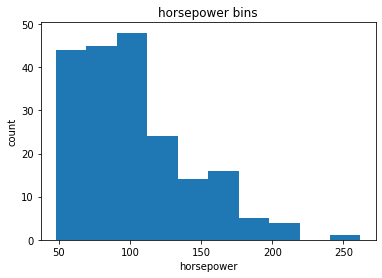

In [ ]:
# Histograma da coluna HORSEPOWER

plt.hist(df["horsepower"])

# Colocando labels nos eixos e o título do gráfico
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

> Queremos incluer os valores mínimo e máximo nos bins, então definimos isso na função do numpy (abaixo). Como queremos 3 grupos (de mesmo tamanho), precisamos de 4 divisores.

In [ ]:
# Criando os 3 bins
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
# Criando os nomes dos grupos
grupos = ['Low', 'Medium', 'High']

In [ ]:
# Criando a coluna com os bins
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=grupos, include_lowest=True)

# Visualizando os dados
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
10,101.0,Low


In [ ]:
# Visualizando os números de veículos para cada bin
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

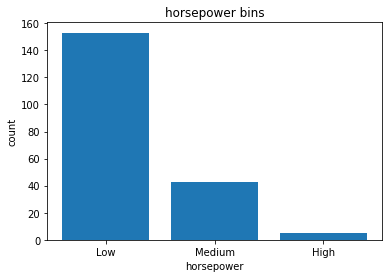

In [ ]:
# Plotando o gráfico de barras para visualizar os dados
plt.bar(grupos, df["horsepower-binned"].value_counts())

# Colocando os labels do gráfico
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [ ]:
# Visualizando os dados atuais
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,13495.0,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,8.703704,16500.0,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,9.038462,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,7.833333,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,10.681818,17450.0,Low


> Como podemos ver, a coluna horsepower-binned está localizada depois da coluna 'price' e isso deixa o dataframe desorganizado. Vamos colocar a coluna 'horsepower-binned' logo após a coluna 'horsepower'.<br>
**OBS:** Isso será aplicado da mesma forma que fizemos anteriormente.

In [ ]:
# Pegando os nomes das colunas
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price', 'horsepower-binned'],
      dtype='object')

In [ ]:
# Criando uma variável com a ordem correta das colunas
ordemcoluna = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'horsepower-binned', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price']

In [ ]:
# Usando a função reindex para mudar a ordem das colunas
df = df.reindex(columns=ordemcoluna)

In [ ]:
# Visualizando novamente
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,horsepower-binned,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,Medium,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,Low,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,Low,5500.0,13.055556,10.681818,17450.0


## 3.4 - Criação de Variáveis Indicadoras

**O que é uma variável indicadora?**<br>
Uma variável indicadora (ou variável dummy) é uma variável numérica usada para rotular categorias. Eles são chamados de 'dummies' porque os números em si não têm significado.<br><br>
**Por que usamos variáveis indicadoras?**<br>
Para análise de regressão posteriormente.

In [ ]:
# Visualizando os valores únicos de cada coluna para ver onde a variável dummy pode ser aplicada
for col in df:
    print(col)
    print(df[col].unique())
    print('A quantidade de valores únicos é: ', df[col].nunique())
    print('\n')

symboling
[ 3  1  2  0 -1 -2]
A quantidade de valores únicos é:  6


normalized-losses
[122 164 158 192 188 121  98  81 118 148 110 145 137 101  78 106  85 107
 104 113 150 129 115  93 142 161 153 125 128 103 168 108 194 231 119 154
  74 186  83 102  89  87  77  91 134  65 197  90  94 256  95]
A quantidade de valores únicos é:  51


make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
A quantidade de valores únicos é:  22


fuel-type
['gas' 'diesel']
A quantidade de valores únicos é:  2


aspiration
['std' 'turbo']
A quantidade de valores únicos é:  2


num-of-doors
['two' 'four']
A quantidade de valores únicos é:  2


body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
A quantidade de valores únicos é:  5


drive-wheels
['rwd' 'fwd' '4wd']
A quantidade de valores únicos é:  3


engine-location
['front' '

Com base nas informações acima, as variáveis indicadoras poderiam ser aplicadas nas seguintes colunas originais do dataframe: fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders e fuel-system.<br>
> Nesse exercício, as seguintes colunas serão utilizadas: fuel-type e aspiration.

### Coluna: fuel-type

In [ ]:
# Usando a biblioteca pandas para criar as novas colunas (0 para false e 1 para true)
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# Modificando os nomes das colunas
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# Concatenando "df" e "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,horsepower-binned,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,13495.0,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,16500.0,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,Medium,5000.0,12.368421,9.038462,16500.0,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,Low,5500.0,9.791667,7.833333,13950.0,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,Low,5500.0,13.055556,10.681818,17450.0,0,1


In [ ]:
# Dropando a coluna original
df.drop(columns=["fuel-type"], inplace = True)

In [ ]:
# Visualizando
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,horsepower-binned,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,13495.0,0,1,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,16500.0,0,1,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,Medium,5000.0,12.368421,9.038462,16500.0,0,1,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,Low,5500.0,9.791667,7.833333,13950.0,0,1,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,Low,5500.0,13.055556,10.681818,17450.0,0,1,1,0


### Coluna: aspiration

In [ ]:
# Criando as novas colunas e renomeando
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration_std', 'turbo':'aspiration_turbo'}, inplace=True)

# Concatenando
df = pd.concat([df, dummy_variable_2], axis=1)

In [ ]:
# Dropando a coluna original 
df.drop(columns=["aspiration"], inplace = True)

In [ ]:
# Visualização

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,horsepower-binned,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,13495.0,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,16500.0,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,Medium,5000.0,12.368421,9.038462,16500.0,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,Low,5500.0,9.791667,7.833333,13950.0,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,Low,5500.0,13.055556,10.681818,17450.0,0,1,1,0


> Novamente, precisamos reorganizar as colunas.

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'horsepower-binned', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price', 'fuel-type-diesel', 'fuel-type-gas',
       'aspiration_std', 'aspiration_turbo'],
      dtype='object')

In [ ]:
novascolunas = ['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'fuel-type-diesel', 'fuel-type-gas',
       'aspiration_std', 'aspiration_turbo', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'horsepower-binned', 'peak-rpm', 'city-L/100km',
       'highway-L/100km', 'price']

df = df.reindex(columns=novascolunas)

In [ ]:
# Visualizando
df.head(20)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo,bore,stroke,compression-ratio,horsepower,horsepower-binned,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,0,1,1,0,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,0,1,1,0,3.47,2.68,9.0,111.0,Low,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,0,1,1,0,2.68,3.47,9.0,154.0,Medium,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,0,1,1,0,3.19,3.40,10.0,102.0,Low,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,0,1,1,0,3.19,3.40,8.0,115.0,Low,5500.0,13.055556,10.681818,17450.0
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,0,1,1,0,3.19,3.40,8.5,110.0,Low,5500.0,12.368421,9.400000,15250.0
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,0,1,1,0,3.19,3.40,8.5,110.0,Low,5500.0,12.368421,9.400000,17710.0
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,0,1,1,0,3.19,3.40,8.5,110.0,Low,5500.0,12.368421,9.400000,18920.0
8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,0,1,0,1,3.13,3.40,8.3,140.0,Medium,5500.0,13.823529,11.750000,23875.0
10,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395,ohc,four,108,mpfi,0,1,1,0,3.50,2.80,8.8,101.0,Low,5800.0,10.217391,8.103448,16430.0


# 4. Visualização de Dados

In [ ]:
# Fazendo importação de uma nova biblioteca

import seaborn as sns

Nessa parte da análise exploratória, faremos diversos gráficos para visualizar melhor os dados.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f097d03b390>,
      dtype=object)

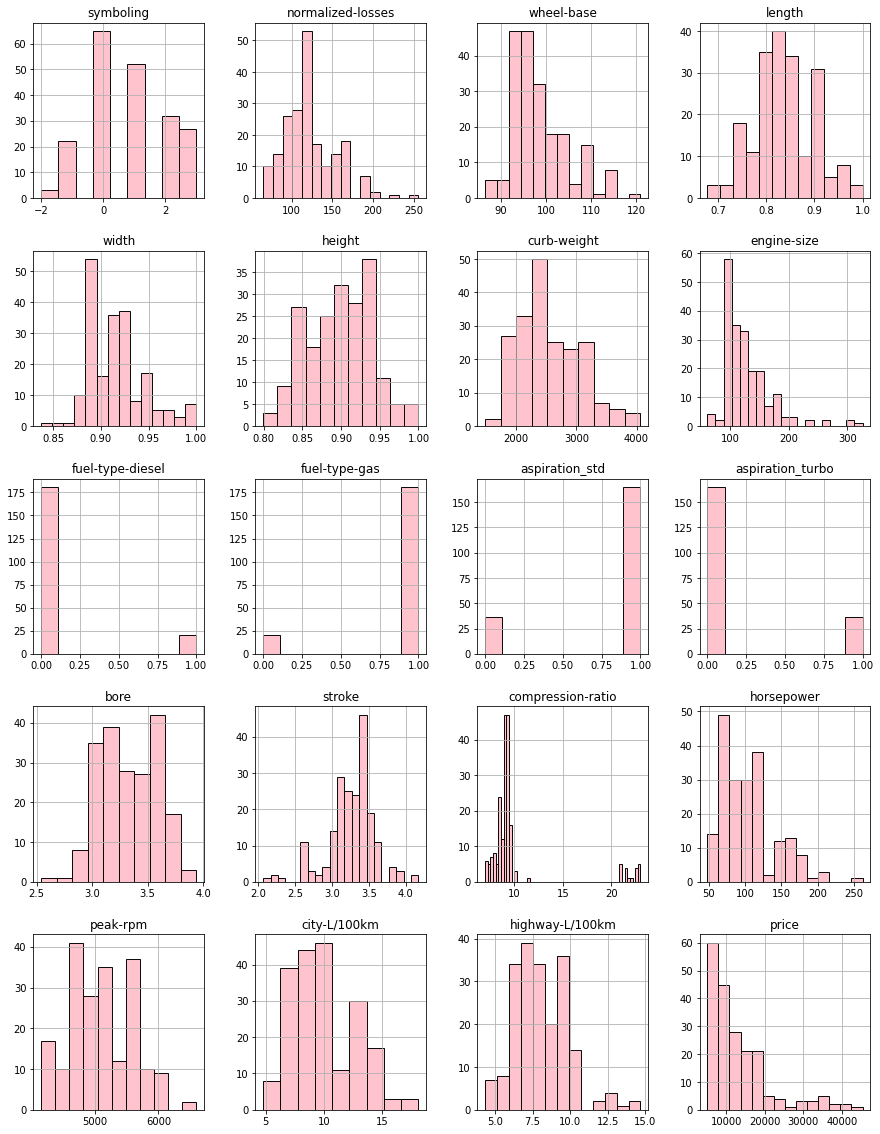

In [ ]:
# Histograma de cada coluna

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax, bins = "auto", ec = "k", alpha = .95, color = "pink")

In [ ]:
# Visualizando a correlação
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,fuel-type-diesel,fuel-type-gas,aspiration_std,aspiration_turbo,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.196735,0.196735,0.054615,-0.054615,-0.139896,-0.007992,-0.182196,0.075790,0.279719,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.101546,0.101546,0.006911,-0.006911,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.307237,-0.307237,-0.256889,0.256889,0.493203,0.157964,0.250313,0.371250,-0.360233,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.211187,-0.211187,-0.230085,0.230085,0.608941,0.123913,0.159733,0.579731,-0.286035,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.244356,-0.244356,-0.305732,0.305732,0.544879,0.188814,0.189867,0.615006,-0.245852,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.281578,-0.281578,-0.090336,0.090336,0.180327,-0.060822,0.259737,-0.086941,-0.309913,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.221046,-0.221046,-0.321955,0.321955,0.644041,0.167412,0.156433,0.757994,-0.279350,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.070779,-0.070779,-0.110040,0.110040,0.572516,0.205806,0.028889,0.822649,-0.256753,0.745059,0.783465,0.872335
fuel-type-diesel,-0.196735,-0.101546,0.307237,0.211187,0.244356,0.281578,0.221046,0.070779,1.000000,-1.000000,-0.408228,0.408228,0.054435,0.241033,0.985231,-0.168977,-0.475759,-0.241282,-0.158091,0.110326
fuel-type-gas,0.196735,0.101546,-0.307237,-0.211187,-0.244356,-0.281578,-0.221046,-0.070779,-1.000000,1.000000,0.408228,-0.408228,-0.054435,-0.241033,-0.985231,0.168977,0.475759,0.241282,0.158091,-0.110326


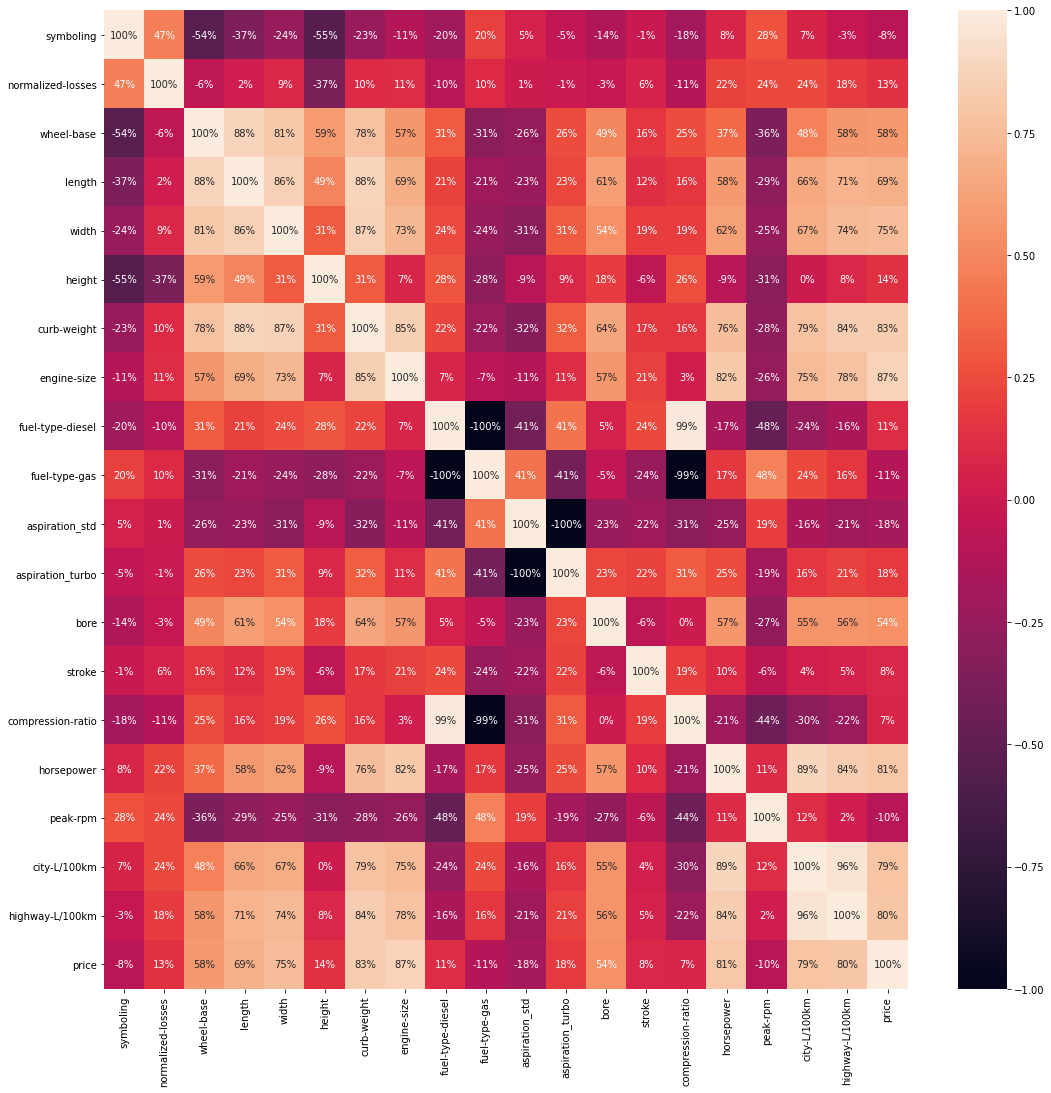

In [ ]:
# Plotando o heatmap
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

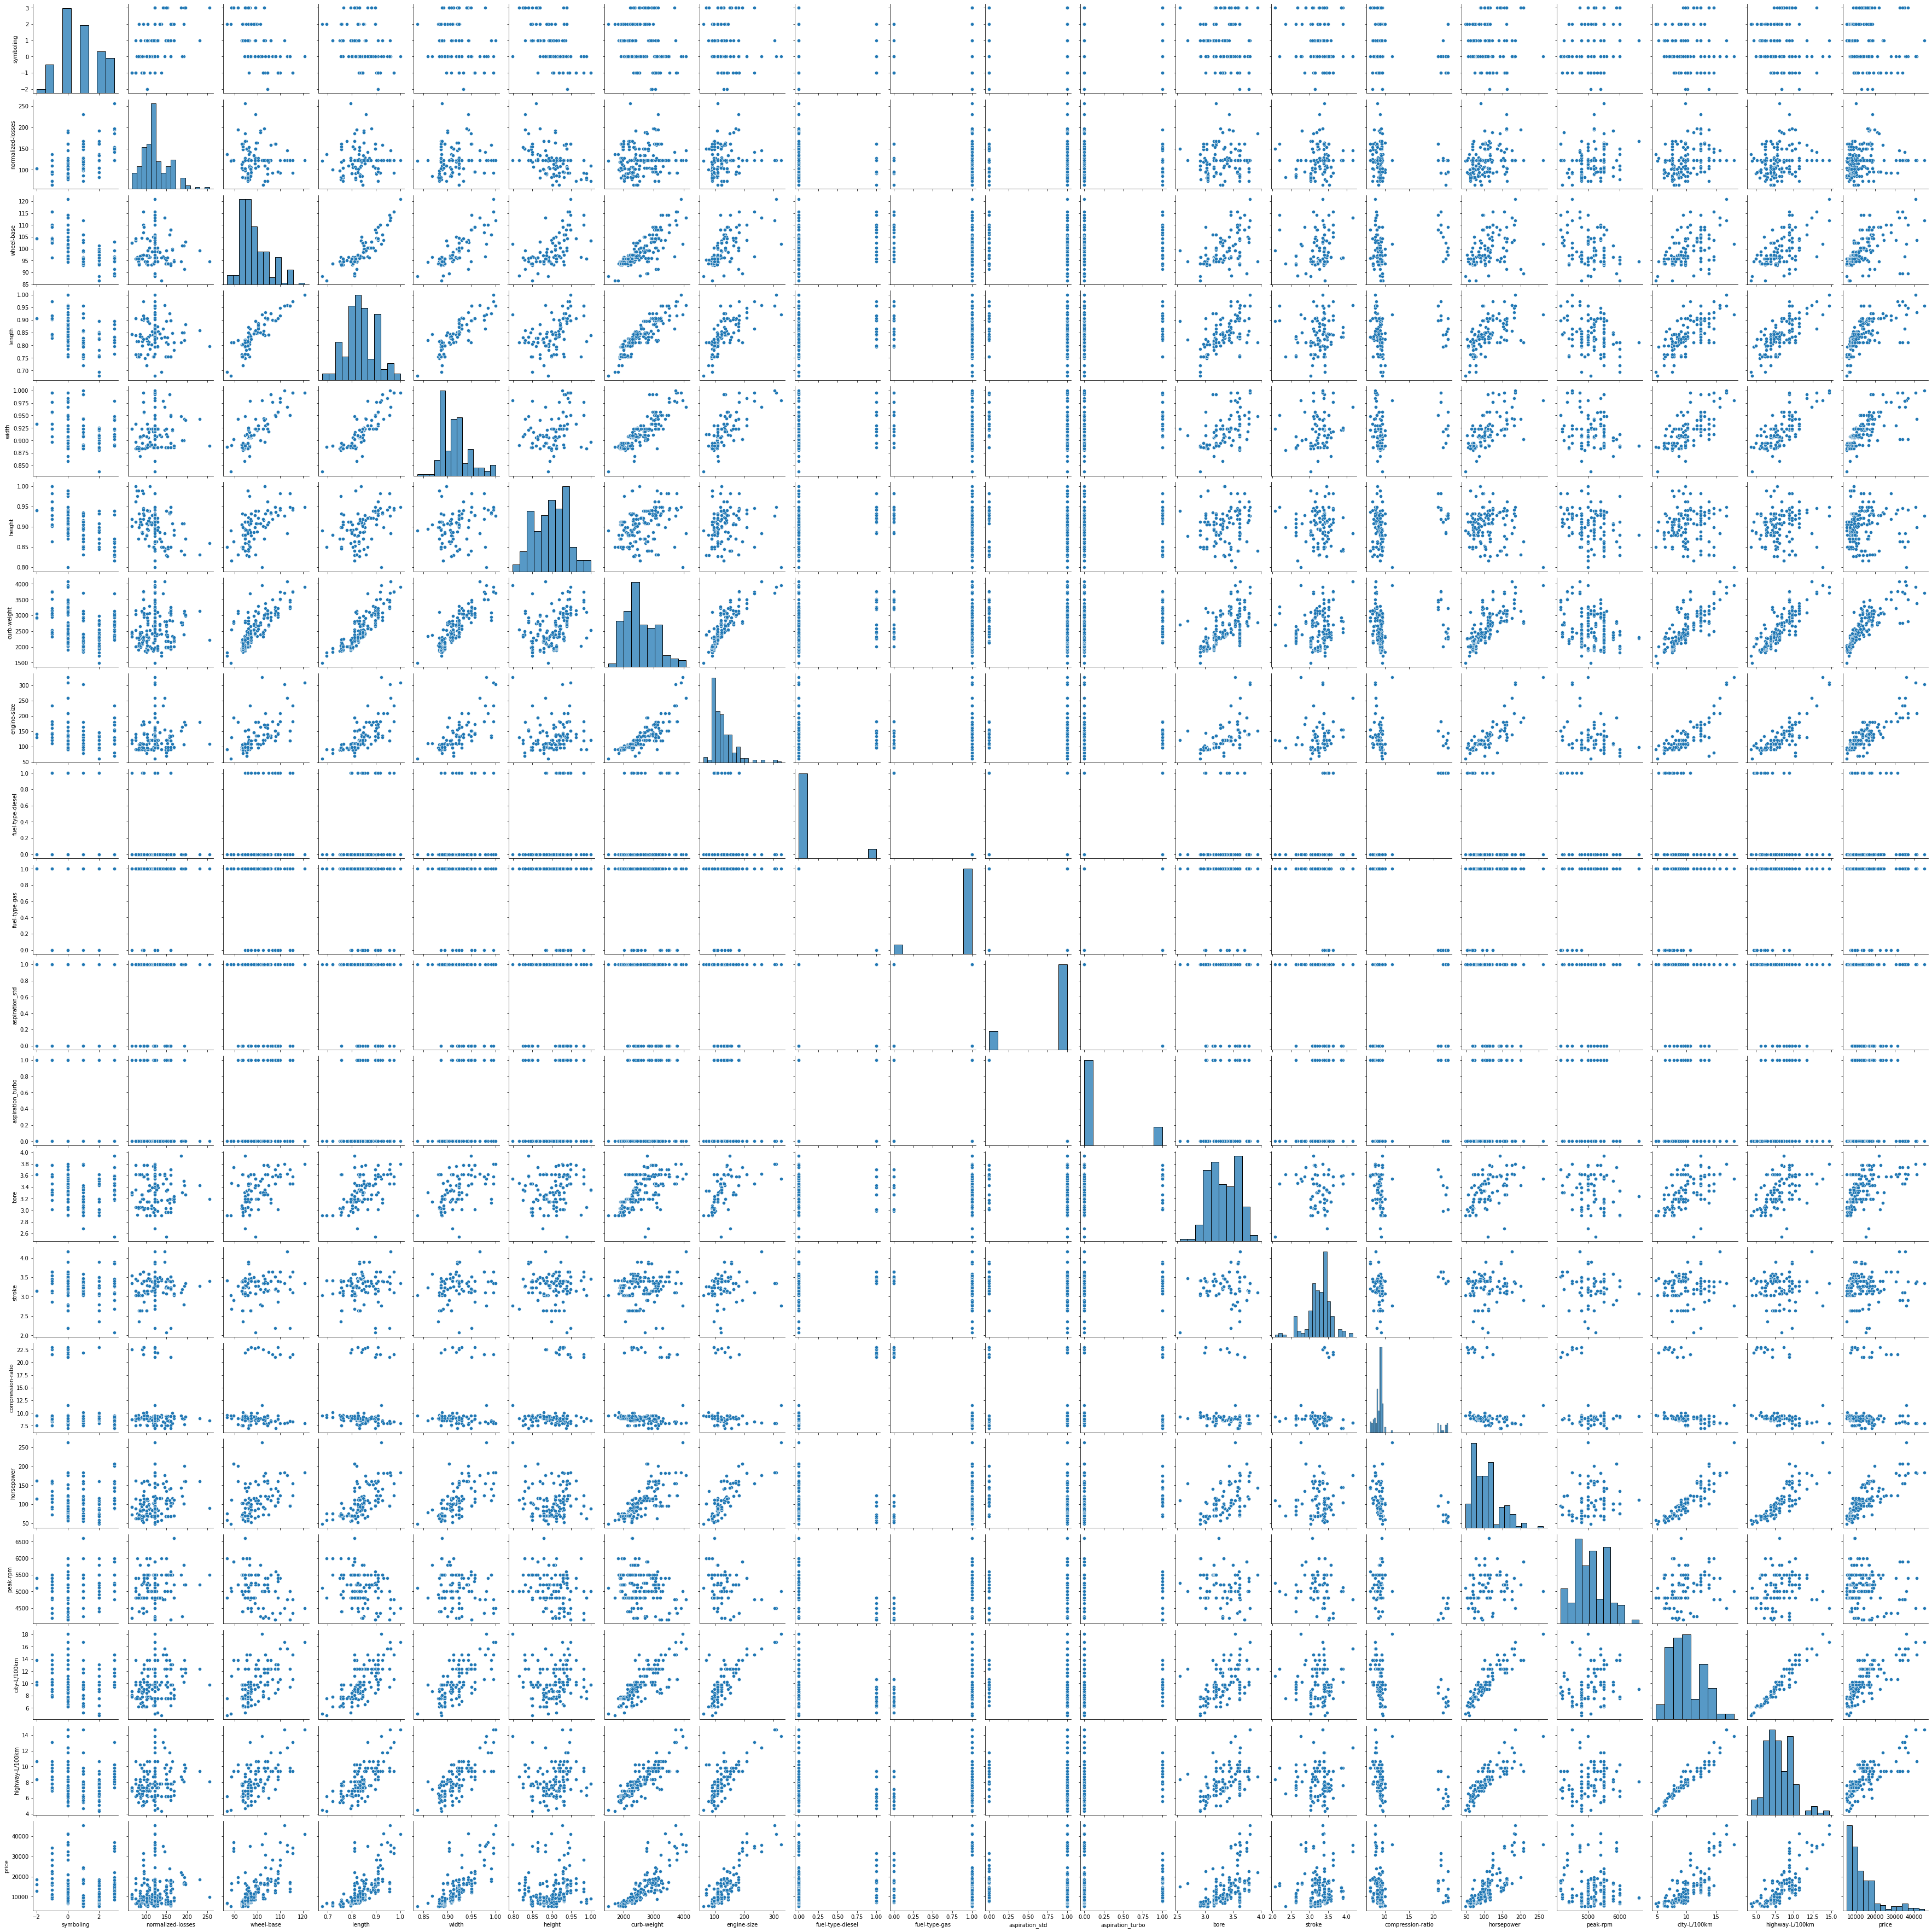

In [ ]:
# Faznedo o pairplot
sns.pairplot(df)

Agora, vamos ver a relação linear de algumas colunas com a coluna 'price' através do regplot.

### Relação Linear Positiva

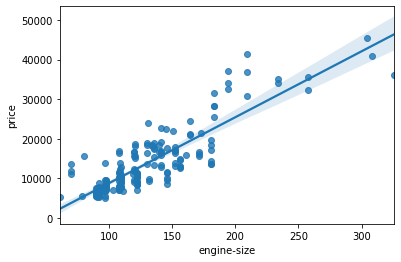

In [ ]:
sns.regplot(x="engine-size", y="price", data=df)

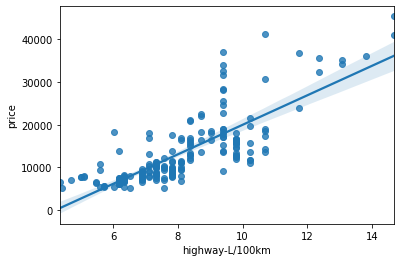

In [ ]:
sns.regplot(x="highway-L/100km", y="price", data=df)

### Relação Linear Fraca

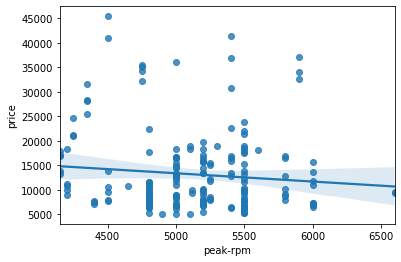

In [ ]:
sns.regplot(x="peak-rpm", y="price", data=df)

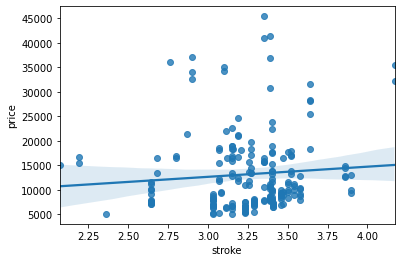

In [ ]:
sns.regplot(x="stroke", y="price", data=df)

# 5. Desenvolvimento de Modelo

### Linear Regression

### Multiple Linear Regression

# 6. Avaliação de Modelo